In [43]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
#Lendo arquivo train.csv e atribuindo ao dataframe
df_train = pd.read_csv("train.csv")

In [3]:
#Printando 5 primeiuras linhas do DF_train
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#n. de linhas e colunas
df_train.shape

(891, 12)

In [5]:
#Informações do DF_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Detalhamento do conjunto de treinamento
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Lendo arquivo test.csv e atribuindo ao dataframe
df_test = pd.read_csv("test.csv")

In [8]:
#Printando 5 primeiuras linhas do DF_test
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#n. de linhas e colunas
df_test.shape

(418, 11)

In [10]:
#Detalhamento do conjunto de test
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


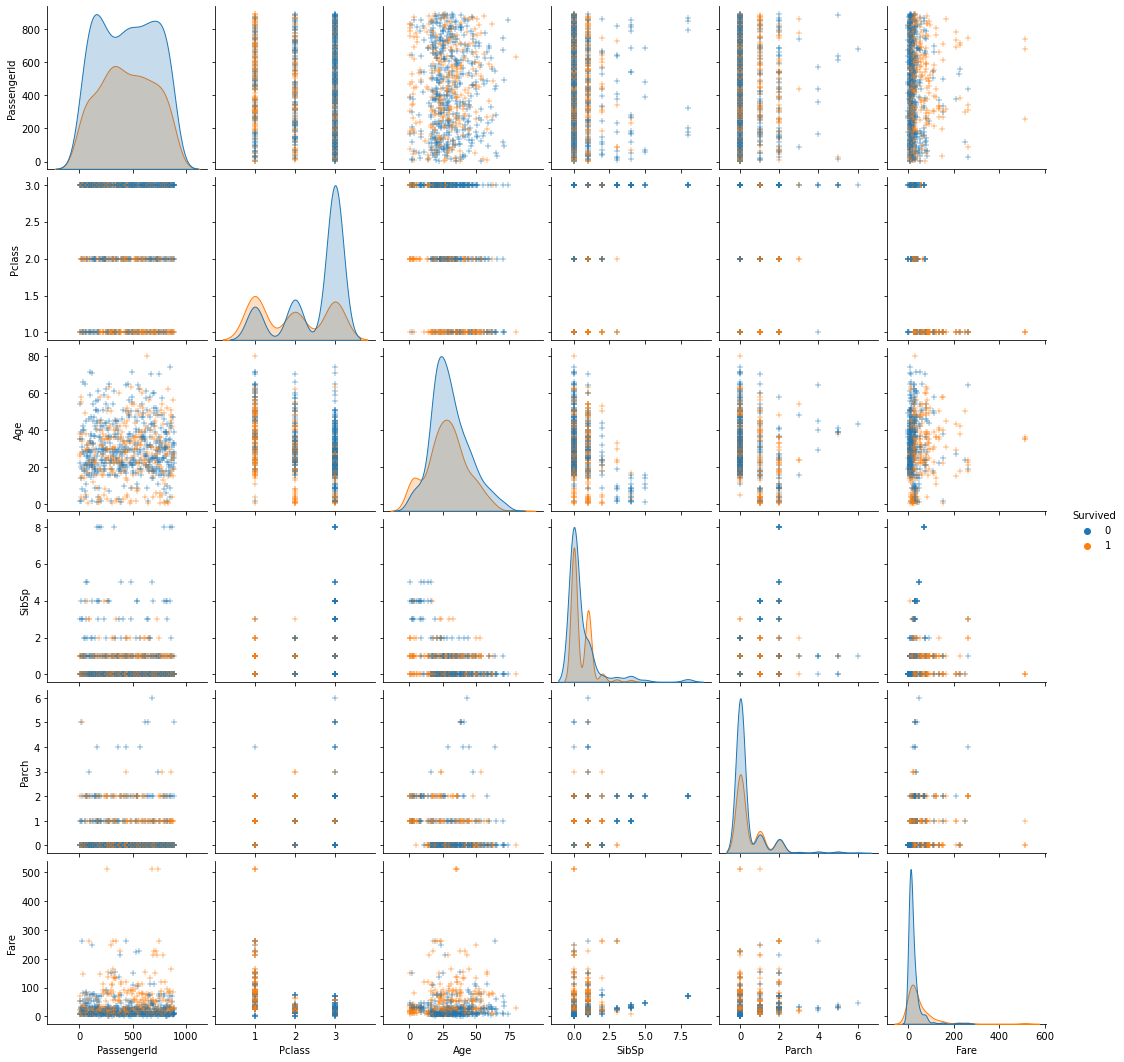

In [11]:
#Vizualizando graficamente o DF_train
a=sns.pairplot(df_train, hue='Survived', markers='+')
plt.show()

In [12]:
# Checando valores nulos no df_train
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Checando valores nulos no df_test
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
# Escolhendo as features que serão usadas
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',]
X = df_train.loc[: ,features]
y = df_train['Survived']

# Mapeando o Sexo para o tipo inteiro
X['Sex'] = X['Sex'].map( {'male':1, 'female':0} )

# Alterando as idades desconhecidas para a média das idades
X['Age'] = X['Age'].fillna(28.0)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [24]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [31]:
#importando Classificador e treinando modelo
decisionTreeClf = DecisionTreeClassifier(random_state=0)
decisionTreeClf.fit(train_X,train_y)

DecisionTreeClassifier(random_state=0)

In [32]:
#Tamanho da árvore
decisionTreeClf.get_depth()

18

[Text(107.64175841449058, 212.71304347826086, 'X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(52.133347602739725, 203.2591304347826, 'X[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(24.078082191780823, 193.80521739130435, 'X[2] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(18.345205479452055, 184.3513043478261, 'X[4] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(16.052054794520547, 174.89739130434782, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(20.638356164383563, 174.89739130434782, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(29.81095890410959, 184.3513043478261, 'X[5] <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(25.224657534246575, 174.89739130434782, 'X[5] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(22.93150684931507, 165.44347826086957, 'X[2] <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(16.052054794520547, 155.98956521739132, 'X[3] <= 0.5\ngini

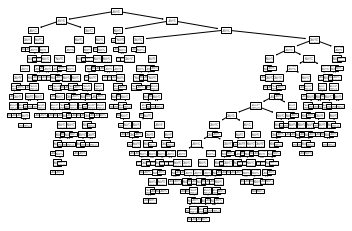

In [23]:
#Plotando a árvore de decisão
tree.plot_tree(decisionTreeClf)

In [36]:
#Predizendo valores e guadando em val_predictions
val_predictions = decisionTreeClf.predict(val_X)

In [39]:
#Printando algumas Métricas
print(classification_report(val_y,val_predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.71      0.71      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [41]:
print(confusion_matrix(val_y,val_predictions))

[[115  24]
 [ 24  60]]


In [37]:
accuracy = accuracy_score(val_y, val_predictions)
accuracy

0.7847533632286996

In [48]:
#!!!NÃO TA FUNCIONANDO!!!
# Visualizar Arvore de decisão
from sklearn.tree import export_graphviz
target_names = np.unique(y)
columns = df_train.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(X.columns))

from subprocess import call

call(['dot', '-T', 'png', 'tree_titanic.dot', '-o', 'tree_titanic.png'])

TypeError: <module 'sklearn.tree' from 'C:\\Users\\alans\\anaconda3\\lib\\site-packages\\sklearn\\tree\\__init__.py'> is not an estimator instance.